The material is based on https://github.com/amueller/scipy_2015_sklearn_tutorial/tree/master/notebooks 

# Representation and Visualization of Data

Machine learning is about creating models from data: for that reason, we'll start by
discussing how data can be represented in order to be understood by the computer.  Along
with this, we'll build on our matplotlib examples and show some
examples of how to visualize data.

## Data in scikit-learn

Data in scikit-learn, with very few exceptions, is assumed to be stored as a
**two-dimensional array**, of size `[n_samples, n_features]`. Many algorithms also accept ``scipy.sparse`` matrices of the same shape.

- **n_samples:**   The number of samples: each sample is an item to process (e.g. classify).
  A sample can be a document, a picture, a sound, a video, an astronomical object,
  a row in database or CSV file,
  or whatever you can describe with a fixed set of quantitative traits.
- **n_features:**  The number of features or distinct traits that can be used to describe each
  item in a quantitative manner.  Features are generally real-valued, but may be boolean or
  discrete-valued in some cases.

The number of features must be fixed in advance. However it can be very high dimensional
(e.g. millions of features) with most of them being zeros for a given sample. This is a case
where `scipy.sparse` matrices can be useful, in that they are
much more memory-efficient than numpy arrays.

Each sample (data point) is a row in the data array, and each feature is a column.

Scikit-learn comes with a few small standard datasets that do not require to download any file from some external website.
* load_boston([return_X_y])	Load and return the boston house-prices dataset (regression).
* load_iris([return_X_y])	Load and return the iris dataset (classification).
* load_diabetes([return_X_y])	Load and return the diabetes dataset (regression).
* load_digits([n_class, return_X_y])	Load and return the digits dataset (classification).
* load_linnerud([return_X_y])	Load and return the linnerud dataset (multivariate regression).
* load_wine([return_X_y])	Load and return the wine dataset (classification).
* load_breast_cancer([return_X_y])	Load and return the breast cancer wisconsin dataset (classification).

### A Simple Example: the Iris Dataset

As another example of a simple dataset, we're going to take a look at the iris data stored by scikit-learn.
The data consists of measurements of three different species of irises.  There are three species of iris
in the dataset, which we can picture here:

Iris Setosa

<img src="figures/iris_setosa.jpg" width="50%">

Iris Versicolor
<img src="figures/iris_versicolor.jpg" width="50%">

Iris Virginica
<img src="figures/iris_virginica.jpg" width="50%">



### Quick Question:

**If we want to design an algorithm to recognize iris species, what might the data be?**

Remember: we need a 2D array of size `[n_samples x n_features]`.

- What would the `n_samples` refer to?

- What might the `n_features` refer to?

Remember that there must be a **fixed** number of features for each sample, and feature
number ``i`` must be a similar kind of quantity for each sample.

### Loading the Iris Data with Scikit-learn

Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica

``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
type(iris)

sklearn.datasets.base.Bunch

The resulting dataset is a ``Bunch`` object: you can see what's available using
the method ``keys()``:

In [4]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

The features of each sample flower are stored in the ``data`` attribute of the dataset:

In [5]:
n_samples, n_features = iris.data.shape
print(n_samples)
print(n_features)
# the sepal length, sepal width, petal length and petal width of the first sample (first flower)
print(iris.data[0])
print(iris.data.shape)

150
4
[ 5.1  3.5  1.4  0.2]
(150, 4)


The information about the class of each sample is stored in the ``target`` attribute of the dataset:

In [6]:
print(iris.target.shape)

(150,)


In [7]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The names of the classes are stored in the last attribute, namely ``target_names``:

In [8]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


This data is four dimensional, but we can visualize two of the dimensions at a time using a simple scatter-plot. Again, we'll start by enabling matplotlib inline mode:

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

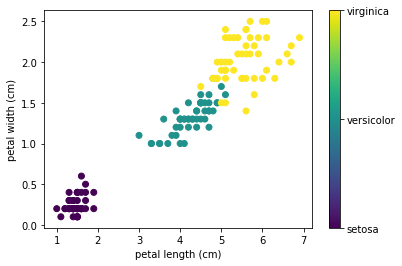

In [14]:
x_index = 2
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

### Quick Exercise:

**Change** `x_index` **and** `y_index` **in the above script
and find a combination of two parameters
which maximally separate the three classes.**

This exercise is a preview of **dimensionality reduction**, which we'll see later.

## Loading Digits Data

Now we'll take a look at another dataset, one where we have to put a bit
more thought into how to represent the data.  We can explore the data in
a similar manner as above:

from sklearn import datasets
digits = datasets.load_digits(10)

In [15]:
from sklearn.datasets import load_digits
digits = load_digits()

In [16]:
type(digits)

sklearn.datasets.base.Bunch

In [17]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [18]:
n_samples, n_features = digits.data.shape
print((n_samples, n_features))

(1797, 64)


In [19]:
print(digits.data[0])

[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]


In [20]:
print(digits.target)
digits.target.shape

[0 1 2 ..., 8 9 8]


(1797,)

The target here is just the digit represented by the data.  The data is an array of
length 64... but what does this data mean?

There's a clue in the fact that we have two versions of the data array:
``data`` and ``images``.  Let's take a look at them:

In [21]:
print(digits.data.shape)
print(digits.images.shape)

(1797, 64)
(1797, 8, 8)


In [22]:
digits.images[0,]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

We can see that they're related by a simple reshaping:

In [23]:
digits.images.reshape((1797, 64)) == digits.data

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [24]:
import numpy as np
print(np.all(digits.images.reshape((1797, 64)) == digits.data))

True


Let's visualize the data. 

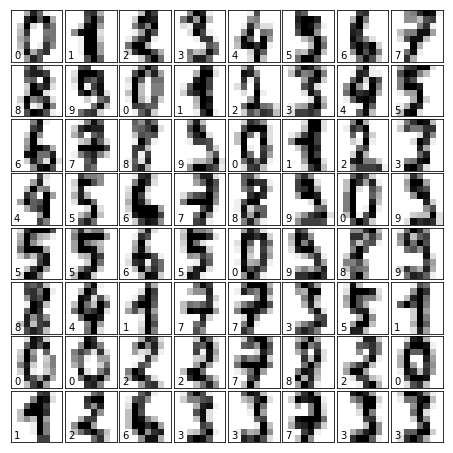

In [25]:
import matplotlib.pyplot as plt

# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

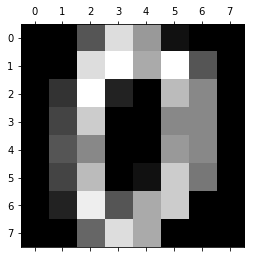

In [26]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0]) 
plt.show() 

## Loading from external datasets

scikit-learn works on any numeric data stored as numpy arrays or scipy sparse matrices. Other types that are convertible to numeric arrays such as pandas DataFrame are also acceptable.
Here are some recommended ways to load standard columnar data into a format usable by scikit-learn:

* pandas.io provides tools to read data from common formats including CSV, Excel, JSON and SQL. DataFrames may also be constructed from lists of tuples or dicts. Pandas handles heterogeneous data smoothly and provides tools for manipulation and conversion into a numeric array suitable for scikit-learn.

* scipy.io specializes in binary formats often used in scientific computing context such as .mat and .arff

* numpy/routines.io for standard loading of columnar data into numpy arrays

* scikit-learn’s datasets.load_svmlight_file for the svmlight or libSVM sparse format

* scikit-learn’s *datasets.load_files for directories of text files where the name of each directory is the name of each category and each file inside of each directory corresponds to one sample from that category

For some miscellaneous data such as images, videos, and audio, you may wish to refer to:
* skimage.io or Imageio for loading images and videos to numpy arrays
* scipy.misc.imread (requires the Pillow package) to load pixel intensities data from various image file formats
* scipy.io.wavfile.read for reading WAV files into a numpy array

In [ ]:
References: http://scikit-learn.org/stable/datasets/index.html#datasets

### How to Load Data in Python with Scikit-Learn


Besides load Packaged Datasets like iris and digits, we can load data from CSV files on your local workstation or on a remote server.

####Load data from a CSV file

**Considerations When Loading CSV Data

* CSV File Header
Does your data have a file header?
If so this can help in automatically assigning names to each column of data. If not, you may need to name your attributes manually.

* Does your data have comments?
Comments in a CSV file are indicated by a hash (“#”) at the start of a line.
If you have comments in your file, depending on the method used to load your data, you may need to indicate whether or not to expect comments and the character to expect to signify a comment line.

* Delimiter
The standard delimiter that separates values in fields is the comma (“,”) character.
Your file could use a different delimiter like tab (“\t”) in which case you must specify it explicitly.

* Quotes
Sometimes field values can have spaces. In these CSV files the values are often quoted.
The default quote character is the double quotation marks “\””. Other characters can be used, and you must specify the quote character used in your file.

Load the CSV file as a numpy matrix.
* NumPy's main object is the homogeneous multidimensional array. It is a table of elements, all of the same type, indexed by a tuple of positive integers. 
* We have to separate the data from the target attributes.

In [27]:
import os
cwd = os.getcwd()
print(cwd)

/home/eckard/IntroMachLearning/introToML


In [28]:
import numpy as np

#skip_header optional argument: 
#the values of this argument must be an integer which corresponds to the number of lines to skip at the beginning of the file, before any other action is performed.
#usecols argument: 
#this argument accepts a single integer or a sequence of integers corresponding to the indices of the columns to import. 
#Remember that by convention, the first column has an index of 0. Negative integers behave the same as regular Python negative indexes.
raw_data = np.genfromtxt(cwd + "/iris_data.csv", delimiter=",", skip_header = 1, usecols=(0,1,2,3))

In [29]:
print(raw_data.shape)

(150, 4)


In [30]:
second = raw_data[1,]
print(second)

third = raw_data[2,]
print(third)

[ 4.9  3.   1.4  0.2]
[ 4.7  3.2  1.3  0.2]


In [31]:
# X stores the features of each sample flower
X = raw_data

# Y stores the feature names
#dtype optional argument: data type of the resulting array. dtype=np.str
Y = np.genfromtxt(cwd + "/iris_data.csv", delimiter=",", skip_header=1, usecols=(4), dtype="str")

target_names = ['setosa', 'versicolor', 'virginica']
feature_names = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

This data is four dimensional, but we can visualize two of the dimensions
at a time using a simple scatter-plot.  Again, we'll start by enabling
matplotlib inline mode:

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

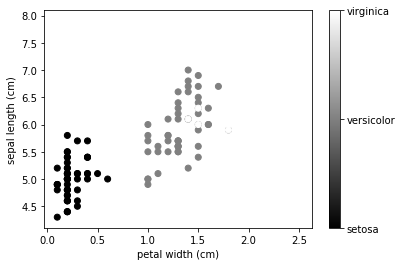

In [33]:
x_index = 3
y_index = 0

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: target_names[int(i)])

plt.scatter(X[:, x_index], X[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(feature_names[x_index])
plt.ylabel(feature_names[y_index])

## Generated Data: the S-Curve

One dataset often used as an example of a simple nonlinear dataset is the S-curve:

In [34]:
from sklearn.datasets import make_s_curve
data, colors = make_s_curve(n_samples=1000)
print(data.shape)
print(colors.shape)

(1000, 3)
(1000,)


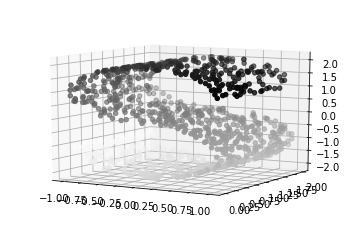

In [35]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors)
ax.view_init(10, -60)

This example is typically used with an unsupervised learning method called Locally
Linear Embedding.  We'll explore unsupervised learning in detail later in the tutorial.